In [1]:
from scipy.misc import imread
from sklearn.externals import joblib

import random as rand
import numpy as np 
import cv2
import glob
import time

import matplotlib.pyplot as plt
%matplotlib inline

from helpers import convert, show_images
from featuresourcer import FeatureSourcer
from binaryclassifier import BinaryClassifier

In [2]:
svc = joblib.load('svc2.pkl')
scaler = joblib.load('scaler2.pkl')
classifier = BinaryClassifier(svc, scaler)

sourcer_params = {
  'color_model': 'yuv',                # hls, hsv, yuv, ycrcb
  'bounding_box_size': 64,             #
  'number_of_orientations': 11,        # 6 - 12
  'pixels_per_cell': 16,               # 8, 16
  'cells_per_block': 2,                # 1, 2
  'do_transform_sqrt': True
}

new_frame1 = imread("vehicles/KITTI_extracted/5364.png") #1
new_frame2 = imread("non-vehicles/Extras/extra4846.png") #0
new_frame3 = imread("vehicles/KITTI_extracted/1.png")    #1
new_frame4 = imread("non-vehicles/Extras/extra1.png")    #0

In [3]:
src = FeatureSourcer(sourcer_params, new_frame1)

src.new_frame(new_frame1)
print(classifier.predict(src.slice(0, 0, 64, 64)), end = "")

src.new_frame(new_frame2)
print(classifier.predict(src.slice(0, 0, 64, 64)), end = "")

src.new_frame(new_frame3)
print(classifier.predict(src.slice(0, 0, 64, 64)), end = "")

src.new_frame(new_frame4)
print(classifier.predict(src.slice(0, 0, 64, 64)), end = "")

1010

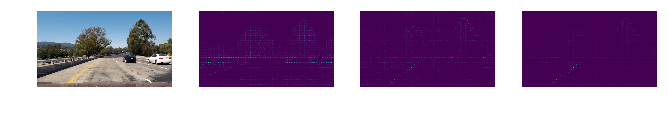

In [4]:
start_frame = imread("test1.jpg")
src.new_frame(start_frame)
rgb_img, a_img, b_img, c_img = src.visualize()
show_images([rgb_img, a_img, b_img, c_img], per_row = 4, per_col = 1, W = 10, H = 2)